# 0. Imports

In [21]:
import json
import os
import pandas as pd
import numpy as np

# 1. generate dataframe to hold results

In [22]:
path = "./data/regression_results/"
results_files = os.listdir(path)

#all_results = dict()
#df_list = []

cols = ['dep_var', 'policy', 'bins_list', 'bin', 'r_squared', 'p_value', 'param', 'std_err']
all_data = dict()
pk = 0
for r in results_files:
    if 'bins' not in r:
        continue
    dep_var = r.split('bins')[0][:-1]
#     print("r = ", r)
    bins_str = r.split('=')[1].split('.')[0]
    bins_list = [(int(e.split('-')[0]), int(e.split('-')[1]))
                  for e in bins_str.split('_')]
    with open(path+r, "r") as f:
        data = json.load(f)
        
    for policy in data:
        r2 = data[policy]['r_squared']
        
        for b in data[policy]['p_values']:
            all_data[pk] = {
                'dep_var': dep_var,
                'bins_list': str(bins_list),
                'policy': policy,
                'bin': b,
                'rsquared': r2,
                'p_value': data[policy]['p_values'][b],
                'param': data[policy]['params'][b],
                'std_err': data[policy]['std_err'][b]
            }
            pk += 1
                
    df = pd.DataFrame.from_dict(all_data, orient='index')

In [23]:
df

,dep_var,bins_list,policy,bin,rsquared,p_value,param,std_err
0,new_deaths_7day_1e6,"[(0, 14), (15, 28), (29, 999)]",outdoor and recreation - stop - county,const,0.000026,0.000000e+00,0.430151,0.000771
1,new_deaths_7day_1e6,"[(0, 14), (15, 28), (29, 999)]",outdoor and recreation - stop - county,0-14,0.000026,1.130057e-06,0.294389,0.060480
2,new_deaths_7day_1e6,"[(0, 14), (15, 28), (29, 999)]",outdoor and recreation - stop - county,15-28,0.000026,6.960655e-09,0.362587,0.062602
3,new_deaths_7day_1e6,"[(0, 14), (15, 28), (29, 999)]",outdoor and recreation - stop - county,29-999,0.000026,5.084651e-01,0.006996,0.010581
4,new_deaths_7day_1e6,"[(0, 14), (15, 28), (29, 999)]",non-essential businesses - stop - state,const,0.014947,0.000000e+00,0.215626,0.001469
...,...,...,...,...,...,...,...,...
3395,new_deaths_1e6,"[(0, 7), (8, 14), (15, 999)]",construction - start - county,15-999,0.000003,5.652222e-03,-0.155881,0.056330
3396,new_deaths_1e6,"[(0, 7), (8, 14), (15, 999)]",executive order - start - state,const,0.000009,0.000000e+00,0.435227,0.001793
3397,new_deaths_1e6,"[(0, 7), (8, 14), (15, 999)]",executive order - start - state,0-7,0.000009,1.094240e-03,-0.383176,0.117355
3398,new_deaths_1e6,"[(0, 7), (8, 14), (15, 999)]",executive order - start - state,8-14,0.000009,5.065421e-03,-0.351633,0.125456


In [24]:
df.sort_values(by='rsquared', ascending=False)

,dep_var,bins_list,policy,bin,rsquared,p_value,param,std_err
643,new_cases_7day_1e6,"[(0, 7), (8, 14), (15, 28), (29, 60), (61, 999)]",childcare - start - state,61-999,0.106255,0.000000e+00,26.913827,0.058712
642,new_cases_7day_1e6,"[(0, 7), (8, 14), (15, 28), (29, 60), (61, 999)]",childcare - start - state,29-60,0.106255,4.552545e-73,1.855164,0.102603
639,new_cases_7day_1e6,"[(0, 7), (8, 14), (15, 28), (29, 60), (61, 999)]",childcare - start - state,0-7,0.106255,3.268474e-04,0.679647,0.189156
640,new_cases_7day_1e6,"[(0, 7), (8, 14), (15, 28), (29, 60), (61, 999)]",childcare - start - state,8-14,0.106255,4.537082e-03,0.571758,0.201452
641,new_cases_7day_1e6,"[(0, 7), (8, 14), (15, 28), (29, 60), (61, 999)]",childcare - start - state,15-28,0.106255,2.413168e-03,0.441225,0.145426
...,...,...,...,...,...,...,...,...
1556,new_deaths_1e6,"[(0, 14), (15, 999)]",personal care - stop - county,15-999,0.000001,1.080018e-01,-0.102967,0.064064
1555,new_deaths_1e6,"[(0, 14), (15, 999)]",personal care - stop - county,0-14,0.000001,4.484749e-01,-0.300007,0.395808
1510,new_deaths_1e6,"[(0, 14), (15, 999)]",entertainment - stop - county,0-14,0.000001,2.577822e-01,0.137159,0.121203
1511,new_deaths_1e6,"[(0, 14), (15, 999)]",entertainment - stop - county,15-999,0.000001,2.983866e-01,-0.021927,0.021085


In [25]:
df.sort_values(by='p_value')

,dep_var,bins_list,policy,bin,rsquared,p_value,param,std_err
0,new_deaths_7day_1e6,"[(0, 14), (15, 28), (29, 999)]",outdoor and recreation - stop - county,const,0.000026,0.000000,0.430151,0.000771
1265,new_cases_1e6,"[(0, 7), (8, 14), (15, 28), (29, 60), (61, 999)]",houses of worship - stop - state,61-999,0.008037,0.000000,11.064851,0.086313
1260,new_cases_1e6,"[(0, 7), (8, 14), (15, 28), (29, 60), (61, 999)]",houses of worship - stop - state,const,0.008037,0.000000,21.443909,0.048025
1259,new_cases_1e6,"[(0, 7), (8, 14), (15, 28), (29, 60), (61, 999)]",outdoor and recreation - stop - state,61-999,0.016097,0.000000,15.069494,0.080674
2719,new_cases_7day_1e6,"[(0, 14), (15, 28), (29, 999)]",gyms - stop - state,29-999,0.084424,0.000000,21.433946,0.050867
...,...,...,...,...,...,...,...,...
90,new_deaths_7day_1e6,"[(0, 14), (15, 28), (29, 999)]",entertainment - start - county,15-28,0.000028,0.978412,-0.000533,0.019711
2775,new_cases_7day_1e6,"[(0, 14), (15, 28), (29, 999)]",personal care - stop - county,29-999,0.000009,0.990113,0.010414,0.840387
2953,new_deaths_1e6,"[(0, 7), (8, 14), (15, 28), (29, 60), (61, 999)]",shelter in place - stop - county,61-999,0.000095,0.993470,-0.000052,0.006386
664,new_cases_7day_1e6,"[(0, 7), (8, 14), (15, 28), (29, 60), (61, 999)]",outdoor and recreation - start - county,8-14,0.000247,0.994336,-0.006645,0.936139


In [26]:
df[(df['dep_var'] == 'new_cases_1e6') & (df['bins_list'] == '[(0, 14), (15, 28), (29, 999)]')]

,dep_var,bins_list,policy,bin,rsquared,p_value,param,std_err
2500,new_cases_1e6,"[(0, 14), (15, 28), (29, 999)]",outdoor and recreation - stop - county,const,0.000035,0.000000e+00,24.544402,0.039361
2501,new_cases_1e6,"[(0, 14), (15, 28), (29, 999)]",outdoor and recreation - stop - county,0-14,0.000035,3.237821e-08,17.072292,3.088283
2502,new_cases_1e6,"[(0, 14), (15, 28), (29, 999)]",outdoor and recreation - stop - county,15-28,0.000035,8.208409e-02,5.558098,3.196660
2503,new_cases_1e6,"[(0, 14), (15, 28), (29, 999)]",outdoor and recreation - stop - county,29-999,0.000035,2.758739e-11,3.597741,0.540287
2504,new_cases_1e6,"[(0, 14), (15, 28), (29, 999)]",non-essential businesses - stop - state,const,0.026928,0.000000e+00,9.928571,0.074544
...,...,...,...,...,...,...,...,...
2695,new_cases_1e6,"[(0, 14), (15, 28), (29, 999)]",construction - start - county,29-999,0.000016,5.576166e-06,5.718120,1.258981
2696,new_cases_1e6,"[(0, 14), (15, 28), (29, 999)]",executive order - start - state,const,0.000312,0.000000e+00,24.472916,0.039563
2697,new_cases_1e6,"[(0, 14), (15, 28), (29, 999)]",executive order - start - state,0-14,0.000312,3.852551e-26,-20.001259,1.891178
2698,new_cases_1e6,"[(0, 14), (15, 28), (29, 999)]",executive order - start - state,15-28,0.000312,3.315059e-18,-17.030884,1.957527


In [27]:
df[df['dep_var'] == 'new_cases_1e6']

,dep_var,bins_list,policy,bin,rsquared,p_value,param,std_err
350,new_cases_1e6,"[(0, 14), (15, 999)]",outdoor and recreation - stop - county,const,0.000035,0.000000e+00,24.544402,0.039361
351,new_cases_1e6,"[(0, 14), (15, 999)]",outdoor and recreation - stop - county,0-14,0.000035,3.237806e-08,17.072292,3.088283
352,new_cases_1e6,"[(0, 14), (15, 999)]",outdoor and recreation - stop - county,15-999,0.000035,7.180054e-12,3.651913,0.532810
353,new_cases_1e6,"[(0, 14), (15, 999)]",non-essential businesses - stop - state,const,0.024921,0.000000e+00,9.928571,0.074620
354,new_cases_1e6,"[(0, 14), (15, 999)]",non-essential businesses - stop - state,0-14,0.024921,1.079129e-22,2.739895,0.279456
...,...,...,...,...,...,...,...,...
2695,new_cases_1e6,"[(0, 14), (15, 28), (29, 999)]",construction - start - county,29-999,0.000016,5.576166e-06,5.718120,1.258981
2696,new_cases_1e6,"[(0, 14), (15, 28), (29, 999)]",executive order - start - state,const,0.000312,0.000000e+00,24.472916,0.039563
2697,new_cases_1e6,"[(0, 14), (15, 28), (29, 999)]",executive order - start - state,0-14,0.000312,3.852551e-26,-20.001259,1.891178
2698,new_cases_1e6,"[(0, 14), (15, 28), (29, 999)]",executive order - start - state,15-28,0.000312,3.315059e-18,-17.030884,1.957527


In [28]:
df[(df['bins_list'] == '[(0, 14), (15, 28), (29, 999)]') &\
   (df['dep_var'] == 'new_deaths_7day_1e6') &\
   (df['policy'] == 'outdoor and recreation - stop - county')]

,dep_var,bins_list,policy,bin,rsquared,p_value,param,std_err
0,new_deaths_7day_1e6,"[(0, 14), (15, 28), (29, 999)]",outdoor and recreation - stop - county,const,0.000026,0.000000e+00,0.430151,0.000771
1,new_deaths_7day_1e6,"[(0, 14), (15, 28), (29, 999)]",outdoor and recreation - stop - county,0-14,0.000026,1.130057e-06,0.294389,0.060480
2,new_deaths_7day_1e6,"[(0, 14), (15, 28), (29, 999)]",outdoor and recreation - stop - county,15-28,0.000026,6.960655e-09,0.362587,0.062602
3,new_deaths_7day_1e6,"[(0, 14), (15, 28), (29, 999)]",outdoor and recreation - stop - county,29-999,0.000026,5.084651e-01,0.006996,0.010581


In [29]:
df['bins_list'][0]

'[(0, 14), (15, 28), (29, 999)]'

# 2. Visualize results - order by r-squared

In [30]:
import seaborn as sns

In [31]:
def show_heatmap_for_bins(df, dep_var, value='rsquared'):
    data = df[(df['dep_var']==dep_var)]
#     data = data[['policy', 'bin', value]]
#     data = data.set_index('policy')
#     data = data.pivot(columns='bin')

#     sns.heatmap(data)
    
    return data
    
data = show_heatmap_for_bins(df, 'new_cases_1e6')

In [32]:
data

,dep_var,bins_list,policy,bin,rsquared,p_value,param,std_err
350,new_cases_1e6,"[(0, 14), (15, 999)]",outdoor and recreation - stop - county,const,0.000035,0.000000e+00,24.544402,0.039361
351,new_cases_1e6,"[(0, 14), (15, 999)]",outdoor and recreation - stop - county,0-14,0.000035,3.237806e-08,17.072292,3.088283
352,new_cases_1e6,"[(0, 14), (15, 999)]",outdoor and recreation - stop - county,15-999,0.000035,7.180054e-12,3.651913,0.532810
353,new_cases_1e6,"[(0, 14), (15, 999)]",non-essential businesses - stop - state,const,0.024921,0.000000e+00,9.928571,0.074620
354,new_cases_1e6,"[(0, 14), (15, 999)]",non-essential businesses - stop - state,0-14,0.024921,1.079129e-22,2.739895,0.279456
...,...,...,...,...,...,...,...,...
2695,new_cases_1e6,"[(0, 14), (15, 28), (29, 999)]",construction - start - county,29-999,0.000016,5.576166e-06,5.718120,1.258981
2696,new_cases_1e6,"[(0, 14), (15, 28), (29, 999)]",executive order - start - state,const,0.000312,0.000000e+00,24.472916,0.039563
2697,new_cases_1e6,"[(0, 14), (15, 28), (29, 999)]",executive order - start - state,0-14,0.000312,3.852551e-26,-20.001259,1.891178
2698,new_cases_1e6,"[(0, 14), (15, 28), (29, 999)]",executive order - start - state,15-28,0.000312,3.315059e-18,-17.030884,1.957527


In [33]:
data = data[['policy', 'bins_list', 'rsquared']]
data

,policy,bins_list,rsquared
350,outdoor and recreation - stop - county,"[(0, 14), (15, 999)]",0.000035
351,outdoor and recreation - stop - county,"[(0, 14), (15, 999)]",0.000035
352,outdoor and recreation - stop - county,"[(0, 14), (15, 999)]",0.000035
353,non-essential businesses - stop - state,"[(0, 14), (15, 999)]",0.024921
354,non-essential businesses - stop - state,"[(0, 14), (15, 999)]",0.024921
...,...,...,...
2695,construction - start - county,"[(0, 14), (15, 28), (29, 999)]",0.000016
2696,executive order - start - state,"[(0, 14), (15, 28), (29, 999)]",0.000312
2697,executive order - start - state,"[(0, 14), (15, 28), (29, 999)]",0.000312
2698,executive order - start - state,"[(0, 14), (15, 28), (29, 999)]",0.000312


In [34]:
data

,policy,bins_list,rsquared
350,outdoor and recreation - stop - county,"[(0, 14), (15, 999)]",0.000035
351,outdoor and recreation - stop - county,"[(0, 14), (15, 999)]",0.000035
352,outdoor and recreation - stop - county,"[(0, 14), (15, 999)]",0.000035
353,non-essential businesses - stop - state,"[(0, 14), (15, 999)]",0.024921
354,non-essential businesses - stop - state,"[(0, 14), (15, 999)]",0.024921
...,...,...,...
2695,construction - start - county,"[(0, 14), (15, 28), (29, 999)]",0.000016
2696,executive order - start - state,"[(0, 14), (15, 28), (29, 999)]",0.000312
2697,executive order - start - state,"[(0, 14), (15, 28), (29, 999)]",0.000312
2698,executive order - start - state,"[(0, 14), (15, 28), (29, 999)]",0.000312


In [35]:
data = data.drop_duplicates()
data2 = data.set_index('policy')
data2 = data2.pivot(columns='bins_list')

In [36]:
data2

rsquared  \
bins_list                                 [(0, 14), (15, 28), (29, 999)]   
policy                                                                     
childcare - start - county                                      0.000120   
childcare - start - state                                       0.031380   
childcare - stop - county                                       0.000014   
childcare - stop - state                                        0.007980   
construction - start - county                                   0.000016   
education - start - state                                       0.000747   
entertainment - start - county                                  0.000160   
entertainment - start - state                                   0.028513   
entertainment - stop - county                                   0.000053   
entertainment - stop - state                                    0.031150   
executive order - start - state                                 0.000312   
executive order - stop - state                                  0.000402   
gatherings - start - state                                      0.001157   
gyms - start - state                                            0.021124   
gyms - stop - state                                             0.029423   
houses of worship - start - county                              0.000061   
houses of worship - start - state                               0.013174   
houses of worship - stop - county                               0.000026   
houses of worship - stop - state                                0.007123   
housing - start - state                                         0.012306   
manufacturing - start - county                                  0.000080   
manufacturing - start - state                                   0.006018   
manufacturing - stop - county                                   0.000027   
manufacturing - stop - state                                    0.004572   
mask mandate - start - county                                   0.000194   
mask mandate - start - state                                    0.023731   
mask mandate - stop - county                                    0.000005   
mask mandate - stop - state                                     0.006995   
medical - start - county                                        0.000187   
medical - start - state                                         0.025211   
non-essential businesses - start - county                       0.000076   
non-essential businesses - start - state                        0.027780   
non-essential businesses - stop - county                        0.000019   
non-essential businesses - stop - state                         0.026928   
nursing homes - start - state                                   0.006044   
outdoor and recreation - start - county                         0.000091   
outdoor and recreation - start - state                          0.021022   
outdoor and recreation - stop - county                          0.000035   
outdoor and recreation - stop - state                           0.014655   
personal care - start - county                                  0.000004   
personal care - start - state                                   0.010367   
personal care - stop - county                                   0.000003   
personal care - stop - state                                    0.004481   
shelter in place - start - county                               0.000717   
shelter in place - start - state                                0.012886   
shelter in place - stop - county                                0.000752   
shelter in place - stop - state                                 0.019945   
state of emergency - start - state                              0.020672   
travel - start - state                                          0.000671   
wholesale trade - start - county                                0.000018   

                                   

In [37]:
data2.columns.values

array([('rsquared', '[(0, 14), (15, 28), (29, 999)]'),
       ('rsquared', '[(0, 14), (15, 999)]'),
       ('rsquared', '[(0, 7), (8, 14), (15, 28), (29, 60), (61, 999)]'),
       ('rsquared', '[(0, 7), (8, 14), (15, 999)]')], dtype=object)

In [38]:
col_tuples = data2.columns.values
new_cols = []
bins_ids = {}
for i, col in enumerate(col_tuples):
    new_cols.append(f"bin_set_{i}")
    bins_ids[f"bin_set_{i}"] = col[1]
    
data2.columns = new_cols

In [39]:
bins_ids

{'bin_set_0': '[(0, 14), (15, 28), (29, 999)]',
 'bin_set_1': '[(0, 14), (15, 999)]',
 'bin_set_2': '[(0, 7), (8, 14), (15, 28), (29, 60), (61, 999)]',
 'bin_set_3': '[(0, 7), (8, 14), (15, 999)]'}

In [40]:
new_cols

['bin_set_0', 'bin_set_1', 'bin_set_2', 'bin_set_3']

In [41]:
data2

,bin_set_0,bin_set_1,bin_set_2,bin_set_3
policy,,,,
childcare - start - county,0.000120,0.000106,0.000206,0.000107
childcare - start - state,0.031380,0.028484,0.036688,0.028484
childcare - stop - county,0.000014,0.000014,0.000019,0.000014
childcare - stop - state,0.007980,0.007069,0.009460,0.007067
construction - start - county,0.000016,0.000011,0.000028,0.000011
education - start - state,0.000747,0.000518,0.001172,0.000516
entertainment - start - county,0.000160,0.000159,0.000175,0.000160
entertainment - start - state,0.028513,0.024964,0.034995,0.024942
entertainment - stop - county,0.000053,0.000051,0.000053,0.000051


In [42]:
import matplotlib.pyplot as plt

<AxesSubplot:ylabel='policy'>

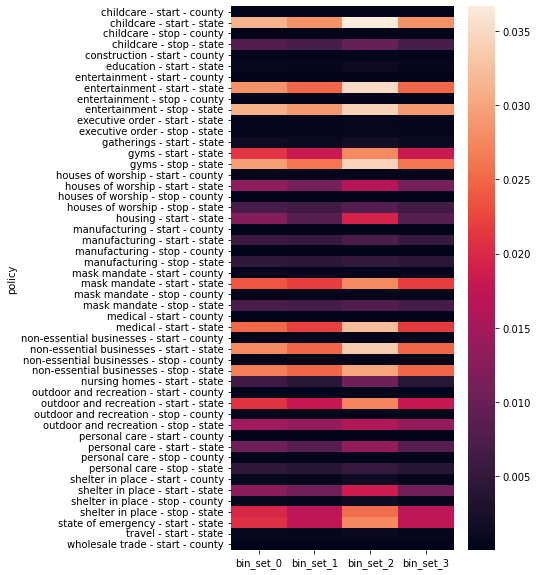

In [43]:
fig, ax = plt.subplots(figsize=[5, 10])

sns.heatmap(data2, ax=ax)

Sorting

In [44]:
# max rsquared
maxes = data2.idxmax().values
max_vals = np.array([data2.loc[m, :][i] for i, m in enumerate(maxes)])
max_col = np.argmax(max_vals)
print(max_col)

2


In [45]:
max_vals

array([0.03138017, 0.02908139, 0.0366881 , 0.02908388])

In [46]:
maxes

array(['childcare - start - state', 'entertainment - stop - state',
       'childcare - start - state', 'entertainment - stop - state'],
      dtype=object)

In [47]:
for i, m in enumerate(maxes):
    print(data2.loc[m, :][i])
    break

0.03138017193708875


In [48]:
maxes

array(['childcare - start - state', 'entertainment - stop - state',
       'childcare - start - state', 'entertainment - stop - state'],
      dtype=object)

<AxesSubplot:ylabel='policy'>

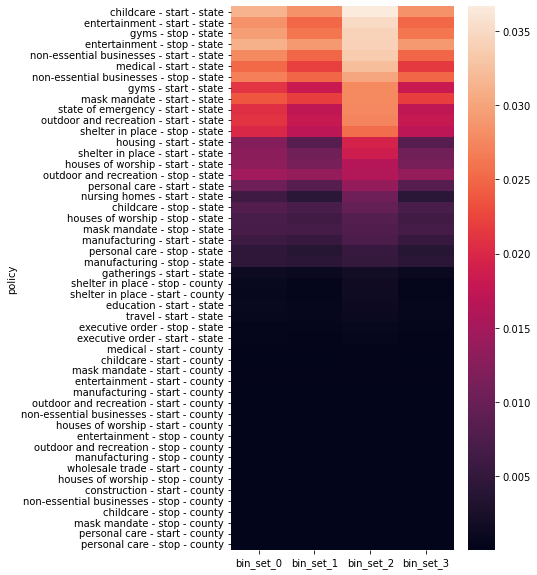

In [49]:
data3 = data2.sort_values(by=data2.columns[max_col], ascending=False)
fig, ax = plt.subplots(figsize=[5, 10])

sns.heatmap(data3, ax=ax)

Questions:

- Which set of bins provides the best model? 
- Which set of policies have the best r squared? 

# Wrap everything into functions

In [52]:
def collect_all_regression_results_to_df(regression_results_path):
    """Collect the results from every regression analysis found in the passed folder
    
    There should be a set of json files with the name format <dep_var>_bins=<bin1>_<bin2>....json
    
    Parameters
    ----------
    regression_results_path
        path to folder with results json files
        
    Returns
    ---------
    pandas dataframe with columns:
        dep_var, bins_list, policy, bin, rsquared, p_value, param, and std_err
    """
    results_files = os.listdir(regression_results_path)

    cols = ['dep_var', 'policy', 'bins_list', 'bin', 'r_squared', 'p_value', 'param', 'std_err']
    all_data = dict()
    pk = 0
    for r in results_files:
        if 'bins' not in r:
            continue
        dep_var = r.split('bins')[0][:-1]
        bins_str = r.split('=')[1].split('.')[0]
        bins_list = [(int(e.split('-')[0]), int(e.split('-')[1]))
                      for e in bins_str.split('_')]
        with open(regression_results_path+r, "r") as f:
            data = json.load(f)

        for policy in data:
            r2 = data[policy]['r_squared']

            for b in data[policy]['p_values']:
                all_data[pk] = {
                    'dep_var': dep_var,
                    'bins_list': str(bins_list),
                    'policy': policy,
                    'bin': b,
                    'rsquared': r2,
                    'p_value': data[policy]['p_values'][b],
                    'param': data[policy]['params'][b],
                    'std_err': data[policy]['std_err'][b]
                }
                pk += 1

        df = pd.DataFrame.from_dict(all_data, orient='index')
    return df

In [53]:
df = collect_all_regression_results_to_df("./data/regression_results/")

In [ ]:
def plot_rsquared_heatmap(data,
                          dep_var,
                          sort_values = True,
                          ax = None):
    """Plots a heatmap of r-squared values for the given dependent variable. Generates a column
    for each set of bins and a row for each policy, where the color is the r-squared value.
    
    Parameters
    ----------
    data
        pandas dataframe: input data, return value of collect_all_regression_results_to_df
    
    dep_var
        string: dependent variable
        
    sort_values
        boolean: if true, sorts the plot such that the column containing the highest r-squared
        value appears in descending order
    
    ax:
        matlotlib axis handle
        
    Returns
    ---------
    ax
        axis handle containing the plot

    bin_ids
        dictionary of bins - used for reference on x-axis
    """
    
    ### data preparation
    data = data[(data['dep_var']==dep_var)]
    data = data[['policy', 'bins_list', 'rsquared']]
    data = data.drop_duplicates()
    data = data.set_index('policy')
    data = data.pivot(columns='bins_list')
    
    ### rename columns
    # generate a set of bin ids
    # this cleans up the plot a bit
    # bin ids will also be returned for reference
    col_tuples = data.columns.values
    new_cols = []
    bins_ids = {}
    for i, col in enumerate(col_tuples):
        new_cols.append(f"bin_set_{i}")
        bins_ids[f"bin_set_{i}"] = col[1]

    data.columns = new_cols
    
    ### optionally sort the dataframe such that the
    # bin containing the maximum r-squared appears sorted
    # in descending order
    if sort_values:
        maxes = data.idxmax().values
        max_vals = np.array([data.loc[m, :][i] for i, m in enumerate(maxes)])
        max_col = np.argmax(max_vals)
        data = data.sort_values(by=data.columns[max_col], ascending=False)

    if ax is None:
        fig, ax = plt.subplots(figsize=[5, 10])

    ax = sns.heatmap(data, ax=ax)

    return ax, bin_ids